<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/timeseriesprac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving perrin-freres-monthly-champagne-.csv to perrin-freres-monthly-champagne-.csv


In [56]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_absolute_error

#Data Description
###The dataset is monthly sales of champagne from year 1964 to 1972.

In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [7]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [8]:
df.columns=['months','sales']
df.head()

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
df.drop(106, axis=0, inplace=True)
df.drop(105, axis=0, inplace=True)
df.tail()

,months,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df['months']=pd.to_datetime(df['months'])

In [11]:
df.head()

,months,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('months', inplace=True)

In [13]:
df.head()

,sales
months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


##Plotting Data
to see components like seasonality, stationarity, ttrend, etc.

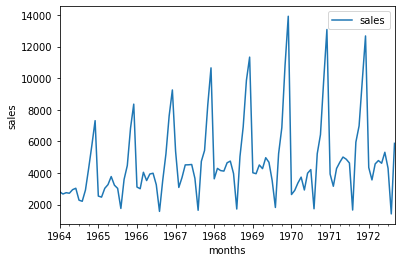

In [14]:
df.plot(ylabel="sales")

#Testing for stationarity using A D Fuller test

###h0: data is not stationary
###h1: data is stationary

In [15]:
test_result = adfuller(df['sales'])

#gives 5 values
#adf test stats, p-value, no of lags used, no of observation used

test_result

(-1.8335930563276188,
 0.363915771660247,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

In [16]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [17]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#Differencing 
###to remove seasonality

In [18]:
df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)

In [19]:
df.head(20)

,sales,Seasonal First Difference
months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


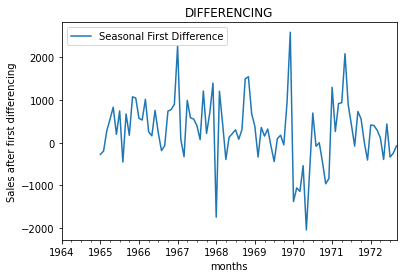

In [21]:
df['Seasonal First Difference'].plot(ylabel='Sales after first differencing', title='DIFFERENCING',legend=True)

#Auotcorrelation and Partial Autocorrealtaion

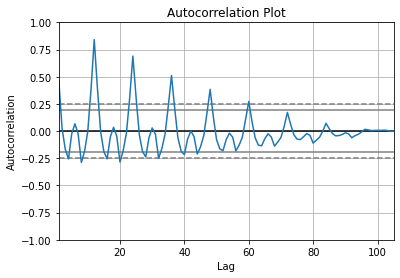

In [22]:
autocorrelation_plot(df['sales'])
plt.title('Autocorrelation Plot')
plt.show()

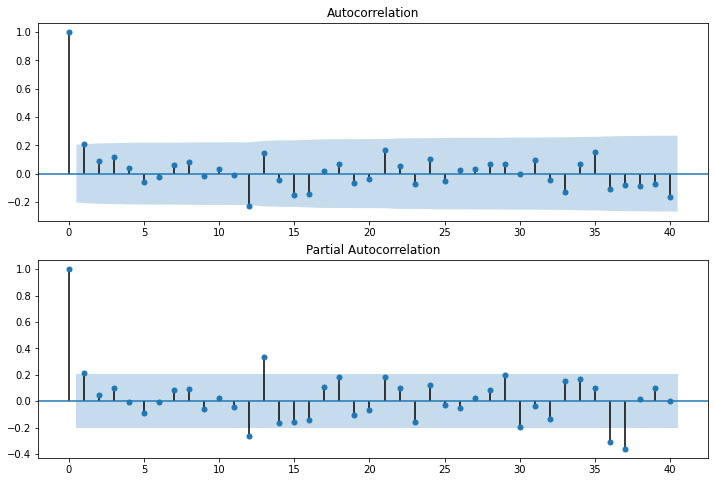

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

#ARIMA
####for non seasonal data

In [26]:
#p=1, d=1 and q=0/1
model = ARIMA(df['Seasonal First Difference'].dropna(), order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                  
=======================================================================================
Dep. Variable:     D.Seasonal First Difference   No. Observations:                   92
Model:                          ARIMA(1, 1, 1)   Log Likelihood                -739.804
Method:                                css-mle   S.D. of innovations            735.111
Date:                         Thu, 16 Jun 2022   AIC                           1487.607
Time:                                 12:00:41   BIC                           1497.695
Sample:                             02-01-1965   HQIC                          1491.679
                                  - 09-01-1972                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.8756      3.531     -1.381      0.171     -11.795       2.044
ar.L1.D.Seasonal First Difference     0.2021      0.103      1.958      0.053      -0.000       0.405
ma.L1.D.Seasonal First Difference    -0.9999      0.033    -30.266      0.000      -1.065      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9473           +0.0000j            4.9473            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

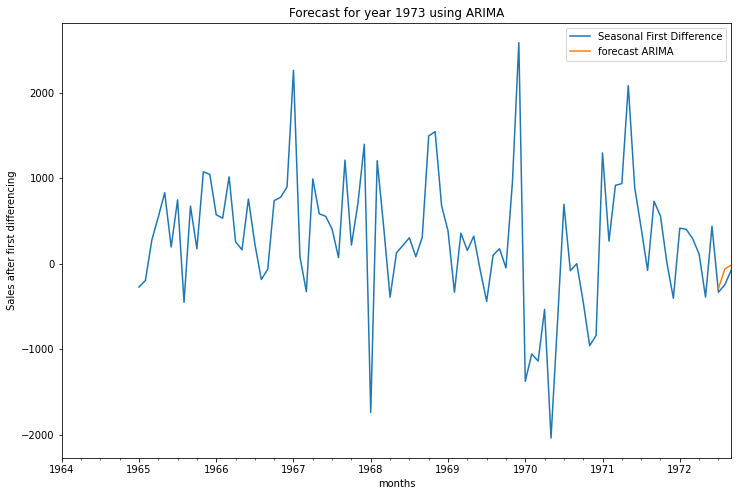

In [28]:
df['forecast ARIMA']= model_fit.predict(start=90,end=103,dynamic=True)
df[['Seasonal First Difference','forecast ARIMA']].plot(figsize=(12,8), ylabel='Sales after first differencing', title='Forecast for year 1973 using ARIMA')

##Calculating mean absolute error for ARIMA

In [38]:
df['forecast ARIMA']= model_fit.predict(start=90,end=103,dynamic=True)
arima_pred = df['forecast ARIMA'][-3:]

In [39]:
arima_act=df['Seasonal First Difference'][-3:]

In [47]:
mae = mean_absolute_error(arima_act, arima_pred)
print('MAE for ARIMA: %f' % mae)

MAE for ARIMA: 94.423626


#SARIMAX

##In sample forecasting using SARIMAX

In [41]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


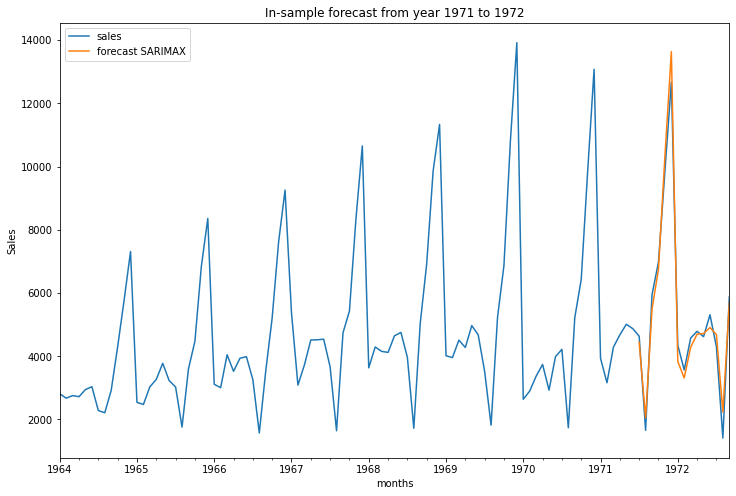

In [49]:
df['forecast SARIMAX']=results.predict(start=90,end=105,dynamic=True)
df[['sales','forecast SARIMAX']].plot(figsize=(12,8),ylabel= 'Sales' ,title='In-sample forecast from year 1971 to 1972')

In [50]:
df['forecast SARIMAX'].tail()

months
1972-05-01    4717.510703
1972-06-01    4906.403902
1972-07-01    4685.436309
1972-08-01    2232.408430
1972-09-01    5686.557791
Name: forecast SARIMAX, dtype: float64

In [51]:
df['sales'].tail()

months
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: sales, dtype: float64

In [57]:
mae = mean_absolute_error(df['sales'][-3:], df['forecast SARIMAX'][-3:])
print('MAE for SARIMAX: %f' % mae)

MAE for SARIMAX: 465.762316


##Out sample forecasting using SARIMAX

In [43]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,96)]

In [44]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dates_df.tail()

,sales,Seasonal First Difference,forecast ARIMA,forecast SARIMAX
1980-04-01,NaN,NaN,NaN,NaN
1980-05-01,NaN,NaN,NaN,NaN
1980-06-01,NaN,NaN,NaN,NaN
1980-07-01,NaN,NaN,NaN,NaN
1980-08-01,NaN,NaN,NaN,NaN


In [45]:
future_df = pd.concat([df, future_dates_df])
future_df.tail()

,sales,Seasonal First Difference,forecast ARIMA,forecast SARIMAX
1980-04-01,NaN,NaN,NaN,NaN
1980-05-01,NaN,NaN,NaN,NaN
1980-06-01,NaN,NaN,NaN,NaN
1980-07-01,NaN,NaN,NaN,NaN
1980-08-01,NaN,NaN,NaN,NaN


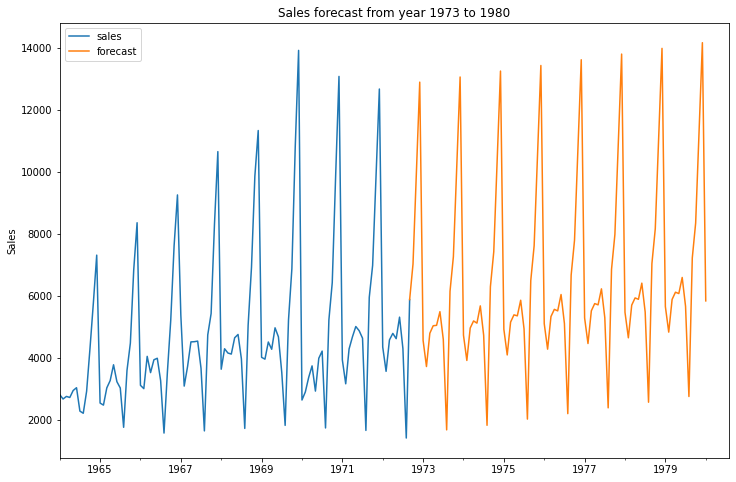

In [46]:
future_df['forecast']=results.predict(start=104,end=192,dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8),ylabel='Sales',title='Sales forecast from year 1973 to 1980')